In [61]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [62]:
df = pd.DataFrame()
df['x1'] =[1,2,3,4,5,6,7,8,9,9]
df['x2'] =[5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [63]:
df.shape

(10, 3)

<Axes: xlabel='x1', ylabel='x2'>

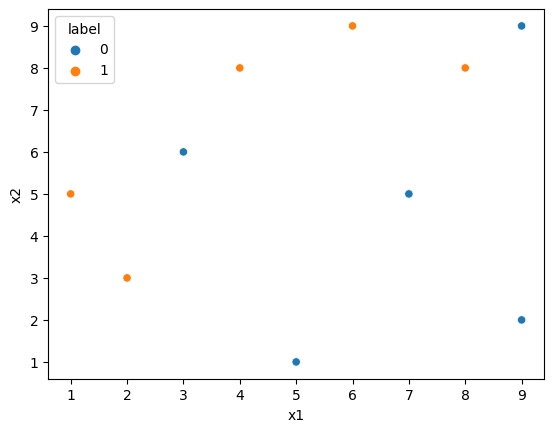

In [64]:
import seaborn as sns
sns.scatterplot(x= df['x1'],y = df['x2'],hue = df['label'])

In [65]:
df['weights']= 1/df.shape[0]

In [66]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [67]:
from sklearn.tree  import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)
x =df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [68]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

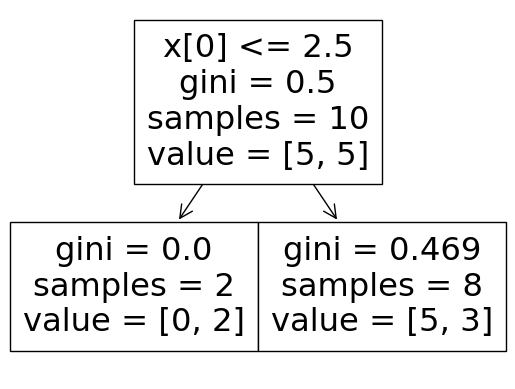

In [69]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

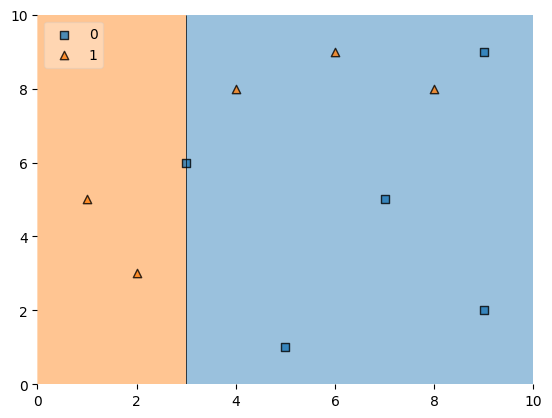

In [70]:
plot_decision_regions(x,y,clf= dt1,legend =2)

In [71]:
df['y_pred'] = dt1.predict(x)

In [72]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,7,5,0,0.1,0
7,8,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [73]:
def calculate_model_weights(error):
    return 0.5*np.log((1-error)/(error+0.000000001))

In [74]:
# stpe3 
alpha1 = calculate_model_weights(0.3)
alpha1

0.42364892852693514

In [75]:
## step4  update the weights 
def update_row_weights(row,alpha =0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else :
        return row['weights']* np.exp(alpha)

In [77]:
df['updated_weights'] =df.apply(update_row_weights,axis =1)

In [78]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,7,5,0,0.1,0,0.065508
7,8,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [79]:
df['normalised_weights'] =df['updated_weights']/df['updated_weights'].sum()

In [80]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,7,5,0,0.1,0,0.065508,0.071475
7,8,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [81]:
df['cumsum_upper'] = np.cumsum(df['normalised_weights'])

In [82]:
df['cumsum_lower'] = df['cumsum_upper']  - df['normalised_weights']

In [83]:
df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,7,5,0,0.1,0,0.065508,0.619017,0.690492
7,8,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [84]:
# upsampling the , increment the change to get the incorrectly predicted row
def create_dataset(df):
    indices =[]
    for i in range (df.shape[0]):
        a = np.random.random()
        for index ,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [85]:
inddex_values = create_dataset(df)
inddex_values

[8, 2, 2, 9, 9, 2, 3, 7, 9, 3]

In [86]:
second_df = df.iloc[inddex_values,[0,1,2,3]]

In [87]:
second_df

,x1,x2,label,weights
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1
7,8,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1


In [88]:
from sklearn.tree  import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(max_depth=1)
x =second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [89]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

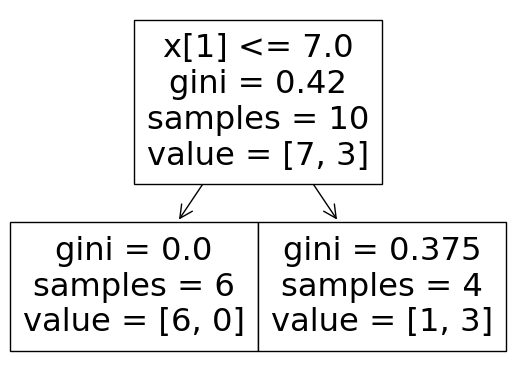

In [90]:
plot_tree(dt2)

<Axes: >

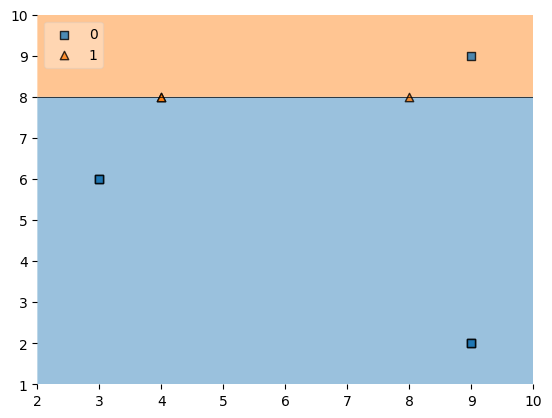

In [91]:
plot_decision_regions(x,y,clf =dt2,legend =2)

In [92]:
second_df['y_pred'] =dt2.predict(x)

In [93]:
second_df

,x1,x2,label,weights,y_pred
8,9,9,0,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
3,4,8,1,0.1,1
7,8,8,1,0.1,1
9,9,2,0,0.1,0
3,4,8,1,0.1,1


In [94]:
alpha2 = calculate_model_weights(0.1)

In [95]:
alpha2

1.0986122836681098

In [96]:
second_df['update_weights'] = second_df.apply(update_row_weights,axis = 1)

In [97]:
second_df

,x1,x2,label,weights,y_pred,update_weights
8,9,9,0,0.1,1,0.152653
2,3,6,0,0.1,0,0.065508
2,3,6,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,1,0.065508
7,8,8,1,0.1,1,0.065508
9,9,2,0,0.1,0,0.065508
3,4,8,1,0.1,1,0.065508


In [98]:
second_df['normalised_weights'] =second_df['update_weights']/second_df['update_weights'].sum()


In [99]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalised_weights'])

In [100]:
second_df['cumsum_lower'] = second_df['cumsum_upper']  - second_df['normalised_weights']

In [101]:
inddex_values1 = create_dataset(df)
inddex_values1

[5, 1, 5, 0, 6, 3, 4, 4, 5, 3]

In [102]:
third_df = df.iloc[inddex_values1,[0,1,2,3]]


,x1,x2,label,weights,y_pred
5,6,9,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,1
6,7,5,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,1
3,4,8,1,0.1,1


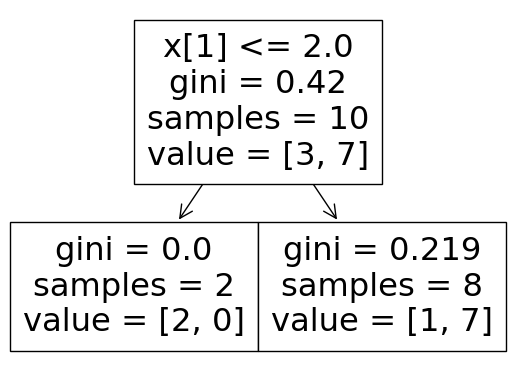

In [103]:
from sklearn.tree  import DecisionTreeClassifier
dt3 = DecisionTreeClassifier(max_depth=1)
x =third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

dt3.fit(x,y)
plot_tree(dt3)
third_df['y_pred'] = dt3.predict(x)
third_df

In [104]:
alpha3 = calculate_model_weights(0.1)


In [105]:
third_df['update_weights'] = third_df.apply(update_row_weights,axis = 1)
third_df['normalised_weights'] = third_df['update_weights']/third_df['update_weights'].sum()
third_df['cumsum_upper'] = np.cumsum(third_df['normalised_weights'])
third_df['cumsum_lower'] = third_df['cumsum_upper']  - third_df['normalised_weights']
inddex_values2 = create_dataset(df)
inddex_values2

[2, 6, 3, 6, 6, 9, 7, 8, 5, 0]

In [106]:
fourth_df = df.iloc[inddex_values2,[0,1,2,3]]

In [107]:
fourth_df

,x1,x2,label,weights
2,3,6,0,0.1
6,7,5,0,0.1
3,4,8,1,0.1
6,7,5,0,0.1
6,7,5,0,0.1
9,9,2,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1


,x1,x2,label,weights,y_pred
2,3,6,0,0.1,1
6,7,5,0,0.1,0
3,4,8,1,0.1,1
6,7,5,0,0.1,0
6,7,5,0,0.1,0
9,9,2,0,0.1,0
7,8,8,1,0.1,0
8,9,9,0,0.1,0
5,6,9,1,0.1,1
0,1,5,1,0.1,1


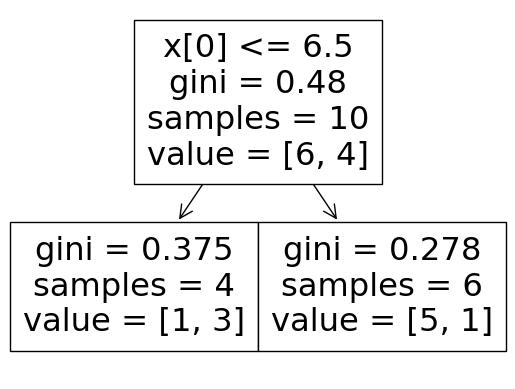

In [108]:
from sklearn.tree  import DecisionTreeClassifier
dt4 = DecisionTreeClassifier(max_depth=1)
x =fourth_df.iloc[:,0:2].values
y = fourth_df.iloc[:,2].values

dt4.fit(x,y)
plot_tree(dt4)
fourth_df['y_pred'] =dt4.predict(x)
fourth_df

###  Prediction 


In [109]:
query = np.array([5,1]).reshape(1,2)
dt1.predict(query)

array([0])

In [110]:
dt2.predict(query)


array([0])

In [111]:
dt3.predict(query)


array([0])

In [113]:
alpha1 * 1 + alpha2*(-1) + alpha3*1

0.42364892852693514

In [ ]:
np.sign()

#### Adaboost Hyperparameter  


* base_estimator
* n_estimator(bydefault = 50)
* 

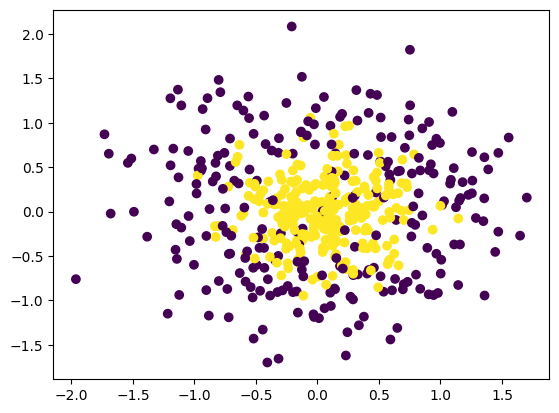

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X[:,0],X[:,1],c=y)




In [116]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))


/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

0.786

In [117]:
abc.fit(X,y)

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

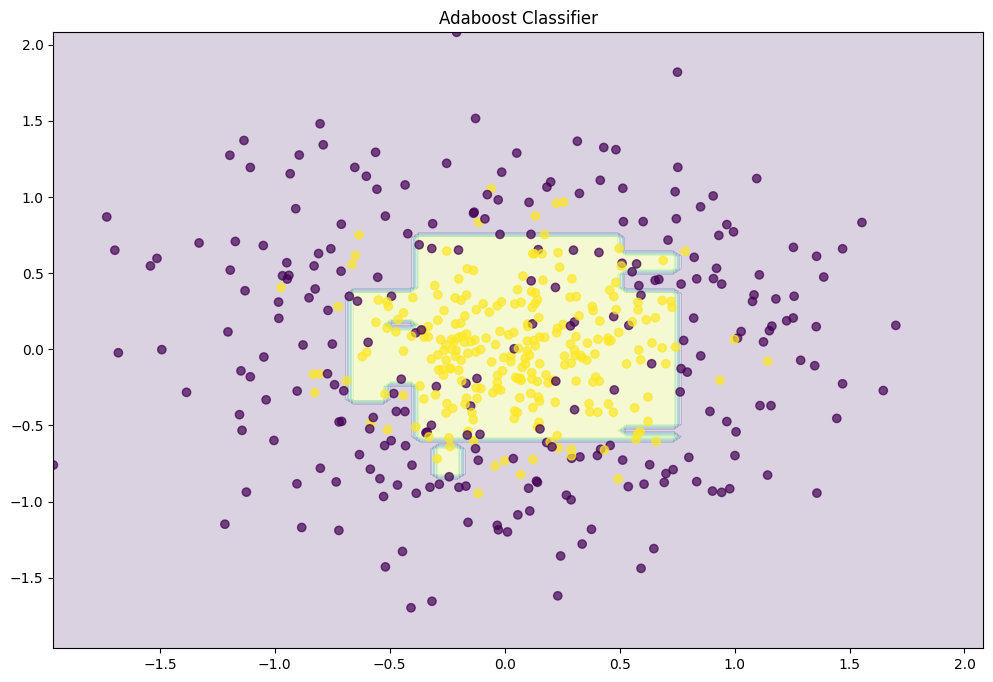

In [118]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


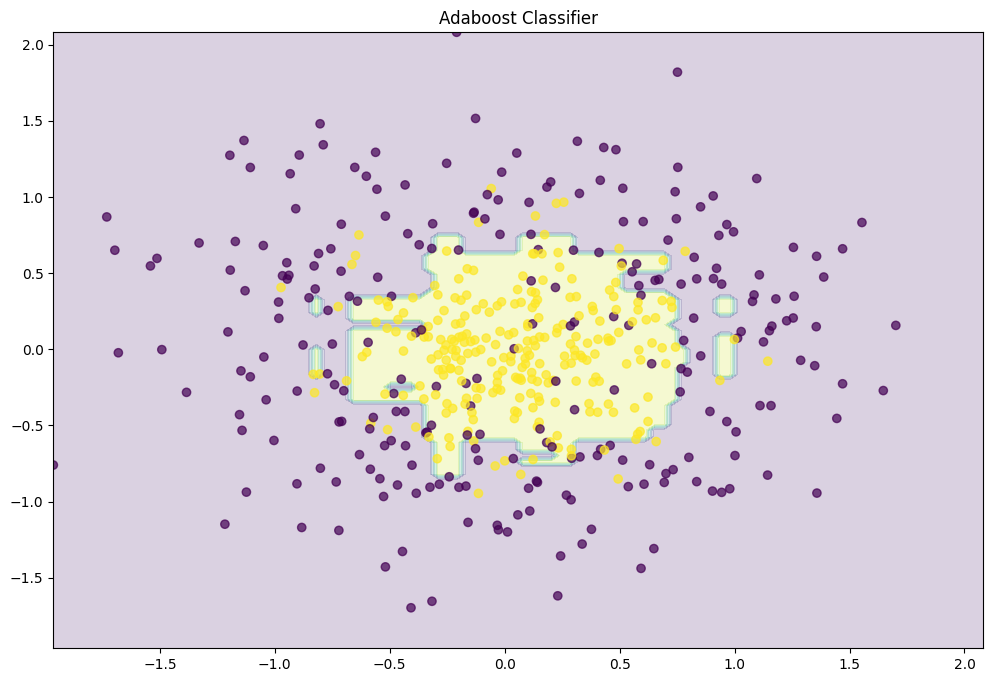

In [126]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)


In [127]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


### Bagging and Boosting 

* Type of model used
   * in bagging we use which have low bias
   * in boosting we use the model which have high bias
   * in bagging we can use parallel learning
   * in the boosting is sequentila learning
   * in bagging all the base model have same weights
   * in boosting every model have differtent weights
   * 